#### Filtro de 2do Orden

<p align="center">
<img src="LPF.png" width="500"/>
</p>

Se puede ver que $x(t)$ es la entrada e $y(t)$ la salida. La función transferencia quedaría:

$$H(s) = \frac{Y(s)}{X(s)} = \frac{1}{LCs^{2} + RCs + 1} $$

Si introducimos la transformación bilinear, nos queda:

$$H_{d}(z) = \frac{T^{2}z^{-2} + 2T^{2}z^{-1} + T^{2}}{(4LC - 2TRC + T^{2})z^{-2} + (-8LC + 2T^{2})z^{-1} + (4LC - 2TRC + T^{2})} $$

Graficamos la respuesta en frequencia de ambos filtros:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sg


In [2]:
fs = 44100  # sample freq (audio)
fc = 1000   # freq de corte

# establecemos los coeficientes del LPF analógico
Q = 0.8
s = 2*np.pi*fc
C = 1e-6
L = 1/(s**2*C)
R = s*L/Q

B = [0, 0, 1]
A = [L*C, R*C, 1]

# establecemos los coeficientes del LPF digital
T = 1/fs
b = [T**2, 2*T**2, T**2]
a = [(4*L*C+2*T*R*C+T**2), (-8*L*C+2*T**2), (4*L*C-2*T*R*C+T**2)]

# rta en freq
W, Hd = sg.freqz(b, a, worN=1024)
t, H = sg.freqs(B, A, worN=fs*W)

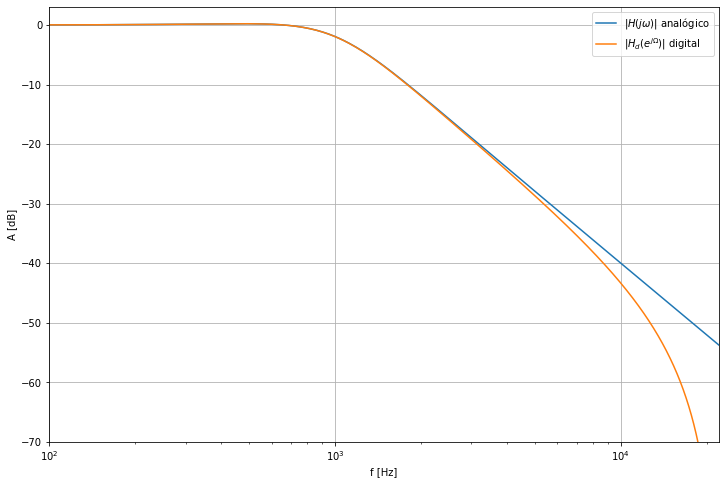

In [3]:
# ploteamos
f = W*fs/(2*np.pi)

plt.figure(figsize=(12, 8))

plt.semilogx(f, 20*np.log10(np.abs(H)),
             label=r'$|H(j \omega)|$ analógico')
plt.semilogx(f, 20*np.log10(np.abs(Hd)),
             label=r'$|H_d(e^{j \Omega})|$ digital')

plt.xlabel('f [Hz]')
plt.ylabel('A [dB]')
plt.axis([100, fs/2, -70, 3])
plt.legend()
plt.grid()
plt.show()

#### Pregunta: Si se aumenta fc del filtro analógico, qué efecto produce en las desviaciones entre el filtro analógico y su equivalente digital?

<details>
  <summary>Solución. Hacer click!</summary>
  
El aumento de fc produce desviaciones más grandes para frecuencias más altas a medida que disminuye el ancho de stop-band del filtro. <br>
Estas desviaciones pueden llevar a una fc distinta a medida que cambia la atenuación en la región de transición entre la banda de paso y la stop-band.
</details>

#### Diseño de filtro digital desde prototipo analógico

In [21]:
w = 2*np.pi*np.array([5000, 6000])  # frec de banda de paso 
N = 2  # order of filter

# pre-warping
w_pw = 2*fs*np.tan(w/(2*fs))

# diseño de filtro analógico, con y sin pre-warping
B, A = sg.butter(N, w, btype='bandpass', analog=True)
B_pw, A_pw = sg.butter(N, w_pw, btype='bandpass', analog=True)

# transformación bilinear
b, a = sg.bilinear(B, A, fs)
b_pw, a_pw = sg.bilinear(B_pw, A_pw, fs)

# rta en frecuencia
W, Hd = sg.freqz(b, a, worN=1024)
W_pw, Hd_pw = sg.freqz(b_pw, a_pw, worN=1024)

t, H = sg.freqs(B, A, worN=fs*W)

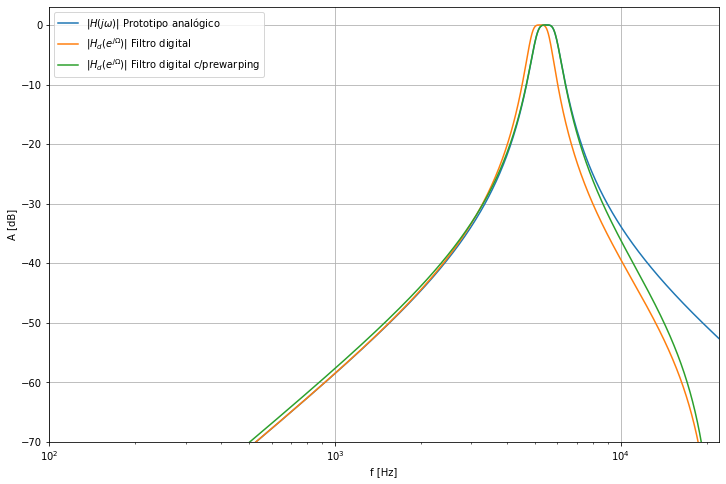

In [22]:
# plot
np.seterr(divide='ignore')

f = W*fs/(2*np.pi)

plt.figure(figsize=(12, 8))

plt.semilogx(f, 20*np.log10(np.abs(H)),
             label=r'$|H(j \omega)|$ Prototipo analógico')
plt.semilogx(f, 20*np.log10(np.abs(Hd)),
             label=r'$|H_d(e^{j \Omega})|$ Filtro digital')
plt.semilogx(f, 20*np.log10(np.abs(Hd_pw)),
             label=r'$|H_d(e^{j \Omega})|$ Filtro digital c/prewarping')

plt.xlabel('f [Hz]')
plt.ylabel('A [dB]')
plt.axis([100, (fs/2), -70, 3])
plt.legend()
plt.grid()

#### Pregunta
* Qué mejora realiza el pre-warping? Para qué lo necesitamos?
* Cambiar la fc del prototipo analógico y ver los desvios. Cuando beneficia pre-warping, cuando no?

<details>
  <summary>Solución. Hacer click!</summary>
  
La ubicación y el ancho de la banda de paso del filtro digital está más cerca de la banda de paso deseada cuando se usa pre-warping en el proceso de diseño. <br>
    
El pre-warping se aprovecha más si la banda de paso deseada está ubicada en frecuencias más altas, ya que las desviaciones causadas por la transformación bilineal son menos prominentes para las frecuencias más bajas. 
</details>